# YouTube Watching Patterns Analysis (2023 vs. 2024)

## Introduction

This project analyzes personal YouTube watch history data to compare viewing patterns in 2023 and 2024. 
By exploring this dataset, we aim to uncover insights into:

- **Temporal Trends**: Differences in viewing activity by time of day, day of the week, and month between the two years.
- **Content Preferences**: Shifts in the types of videos watched, including genres and channels.
- **Engagement Patterns**: Changes in binge-watching behavior and diversity of content consumed.

### **Dataset**
- **Source**: Google Takeout YouTube watch history export.
- **Time Range**: February 14, 2023, to the present.
- **Fields Extracted**:
  - Timestamps: Date and time of each video watched.
  - Titles and URLs: Metadata for video classification.
  - Channel Names: Creators of the videos.

### **Research Question**
How have my YouTube watching patterns evolved between 2023 and 2024 in terms of temporal habits, content preferences, and engagement trends?

---

## Setup

Below are the necessary imports and setup steps for the project.



In [56]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
from collections import Counter
import re
import os


# Navigate to the project root directory (one level up from the notebook directory)
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), ".."))
os.chdir(PROJECT_ROOT)  # Change working directory to project root

# Create directories at the root level
os.makedirs("data/raw", exist_ok=True)
os.makedirs("data/processed", exist_ok=True)
os.makedirs("notebook", exist_ok=True)
os.makedirs("outputs", exist_ok=True)
os.makedirs("visualizations", exist_ok=True)

# Define paths for reference
DATA_DIR_RAW = os.path.join(PROJECT_ROOT, "data/raw/")
DATA_DIR_PROCESSED = os.path.join(PROJECT_ROOT, "data/processed/")
VISUAL_DIR = os.path.join(PROJECT_ROOT, "visualizations/")
OUTPUT_DIR = os.path.join(PROJECT_ROOT, "outputs/")

print(f"Project setup complete. Directories created at: {PROJECT_ROOT}")



Project setup complete. Directories created at: d:\CS210-Project


In [145]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy.stats import ttest_ind

# Define directories
DATA_DIR_RAW = "data/raw/"
DATA_DIR_PROCESSED = "data/processed/"
VISUAL_DIR = "visualizations/"
os.makedirs(DATA_DIR_RAW, exist_ok=True)
os.makedirs(DATA_DIR_PROCESSED, exist_ok=True)
os.makedirs(VISUAL_DIR, exist_ok=True)

# Load raw JSON data
raw_json_path = os.path.join(DATA_DIR_RAW, "izleme_gecmisi.json")
with open(raw_json_path, "r", encoding="utf-8") as file:
    watch_history = json.load(file)

# Extract relevant data
data = []
for entry in watch_history:
    timestamp = pd.to_datetime(entry.get("time"), errors="coerce")
    title = entry.get("title", "Unknown Title")
    channel = (
        entry.get("subtitles", [{}])[0].get("name", "Unknown Channel")
        if entry.get("subtitles")
        else "Unknown Channel"
    )
    url = entry.get("titleUrl", None)
    data.append([timestamp, title, channel, url])

# Create DataFrame
columns = ["Timestamp", "Title", "Channel Name", "URL"]
youtube_df = pd.DataFrame(data, columns=columns)

# Clean and process data
youtube_df["Year"] = youtube_df["Timestamp"].dt.year
youtube_df["Month"] = youtube_df["Timestamp"].dt.month_name()
youtube_df["Day"] = youtube_df["Timestamp"].dt.day_name()
youtube_df["Hour"] = youtube_df["Timestamp"].dt.hour
youtube_df["Week"] = youtube_df["Timestamp"].dt.isocalendar().week
youtube_df["Is Weekend"] = youtube_df["Day"].isin(["Saturday", "Sunday"])
youtube_df["Is Missing Title"] = youtube_df["Title"].eq("Unknown Title")
youtube_df["Channel Name"] = youtube_df["Channel Name"].str.strip().str.title()

# Filter for relevant years
youtube_df = youtube_df.dropna(subset=["Timestamp"])
youtube_df = youtube_df[youtube_df["Year"].isin([2023, 2024])]

# Remove duplicates
youtube_df = youtube_df.drop_duplicates(subset=["Timestamp", "Title", "Channel Name", "URL"])

# Save cleaned data
processed_csv_path = os.path.join(DATA_DIR_PROCESSED, "youtube_cleaned.csv")
youtube_df.to_csv(processed_csv_path, index=False)
print(f"Cleaned data saved to {processed_csv_path}")


Cleaned data saved to data/processed/youtube_cleaned.csv


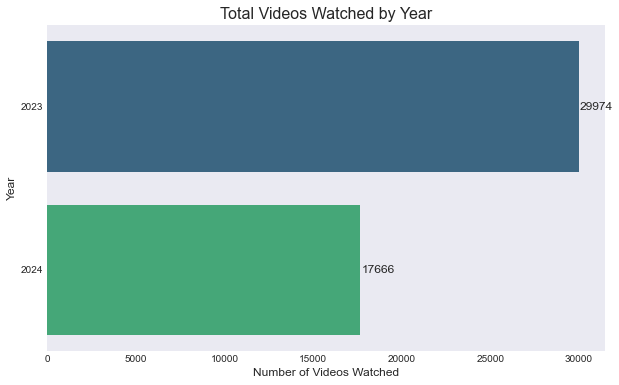

'\n# Daily viewing trends by year\ndaily_counts = youtube_df.groupby(["Year", "Day"])["Title"].count().unstack()\ndaily_counts.plot(kind="bar", figsize=(10, 6), stacked=False)\nplt.title("Viewing Trends by Day of the Week (2023 vs 2024)")\nplt.xlabel("Day")\nplt.ylabel("Number of Videos Watched")\nplt.xticks(rotation=45)\nplt.legend(title="Year")\nplt.savefig(os.path.join(VISUAL_DIR, "daily_trends_yearly.png"))\nplt.show()\n\n# Monthly viewing trends by year\nmonthly_counts = youtube_df.groupby(["Year", "Month"])["Title"].count().unstack()\nmonthly_counts.plot(kind="line", figsize=(10, 6))\nplt.title("Monthly Viewing Trends (2023 vs 2024)")\nplt.xlabel("Month")\nplt.ylabel("Number of Videos Watched")\nplt.legend(title="Year")\nplt.grid()\nplt.savefig(os.path.join(VISUAL_DIR, "monthly_trends_yearly.png"))\nplt.show()\n\n'

In [151]:
# Total videos watched by year

# Total videos watched by year
# Total videos watched per year
yearly_counts = youtube_df.groupby("Year")["Title"].count()

# Total videos watched by year
plt.figure(figsize=(10, 6))
sns.barplot(x=yearly_counts.values, y=yearly_counts.index, palette="viridis", orient='h')
plt.title("Total Videos Watched by Year", fontsize=16)
plt.xlabel("Number of Videos Watched", fontsize=12)
plt.ylabel("Year", fontsize=12)

# Add annotations for counts
for index, value in enumerate(yearly_counts.values):
    plt.text(value + 50, index, f"{value}", va="center", fontsize=12)

plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.savefig(os.path.join(VISUAL_DIR, "total_videos_watched_yearly.png"))
plt.show()

"""
# Daily viewing trends by year
daily_counts = youtube_df.groupby(["Year", "Day"])["Title"].count().unstack()
daily_counts.plot(kind="bar", figsize=(10, 6), stacked=False)
plt.title("Viewing Trends by Day of the Week (2023 vs 2024)")
plt.xlabel("Day")
plt.ylabel("Number of Videos Watched")
plt.xticks(rotation=45)
plt.legend(title="Year")
plt.savefig(os.path.join(VISUAL_DIR, "daily_trends_yearly.png"))
plt.show()

# Monthly viewing trends by year
monthly_counts = youtube_df.groupby(["Year", "Month"])["Title"].count().unstack()
monthly_counts.plot(kind="line", figsize=(10, 6))
plt.title("Monthly Viewing Trends (2023 vs 2024)")
plt.xlabel("Month")
plt.ylabel("Number of Videos Watched")
plt.legend(title="Year")
plt.grid()
plt.savefig(os.path.join(VISUAL_DIR, "monthly_trends_yearly.png"))
plt.show()

"""

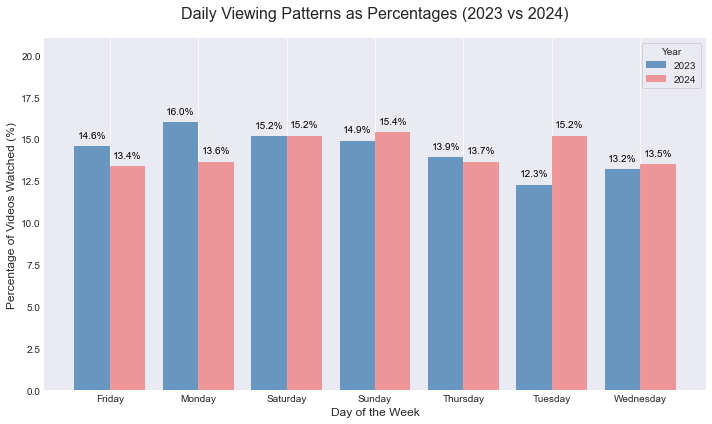

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns

daily_counts = youtube_df.groupby(["Year", "Day"])["Title"].count().unstack(fill_value=0)
daily_counts_pct = daily_counts.div(daily_counts.sum(axis=1), axis=0) * 100
# Define the bar width
bar_width = 0.4

# Define x positions for bars
x = range(len(daily_counts_pct.columns))  # Days of the week

# Create the plot
plt.figure(figsize=(10, 6))

# Plot bars for 2023 and 2024
plt.bar(x, daily_counts_pct.loc[2023], width=bar_width, label="2023", color="steelblue", alpha=0.8)
plt.bar([i + bar_width for i in x], daily_counts_pct.loc[2024], width=bar_width, label="2024", color="lightcoral", alpha=0.8)

# Customize the plot
plt.title("Daily Viewing Patterns as Percentages (2023 vs 2024)", fontsize=16, pad=20)
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Percentage of Videos Watched (%)", fontsize=12)
plt.xticks([i + bar_width / 2 for i in x], daily_counts_pct.columns, fontsize=10)
plt.ylim(0, max(daily_counts_pct.loc[2023].max(), daily_counts_pct.loc[2024].max()) + 5)
plt.legend(title="Year", fontsize=10, loc="upper right", frameon=True)
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Add annotations (only for the highest bar per day to reduce clutter)
for i in range(len(daily_counts_pct.columns)):
    plt.text(i, daily_counts_pct.loc[2023][i] + 0.5, f"{daily_counts_pct.loc[2023][i]:.1f}%", ha="center", fontsize=10, color="black")
    plt.text(i + bar_width, daily_counts_pct.loc[2024][i] + 0.5, f"{daily_counts_pct.loc[2024][i]:.1f}%", ha="center", fontsize=10, color="black")

# Save and show plot
plt.tight_layout()
plt.savefig(os.path.join(VISUAL_DIR, "daily_trends_cleaned.png"))
plt.show()



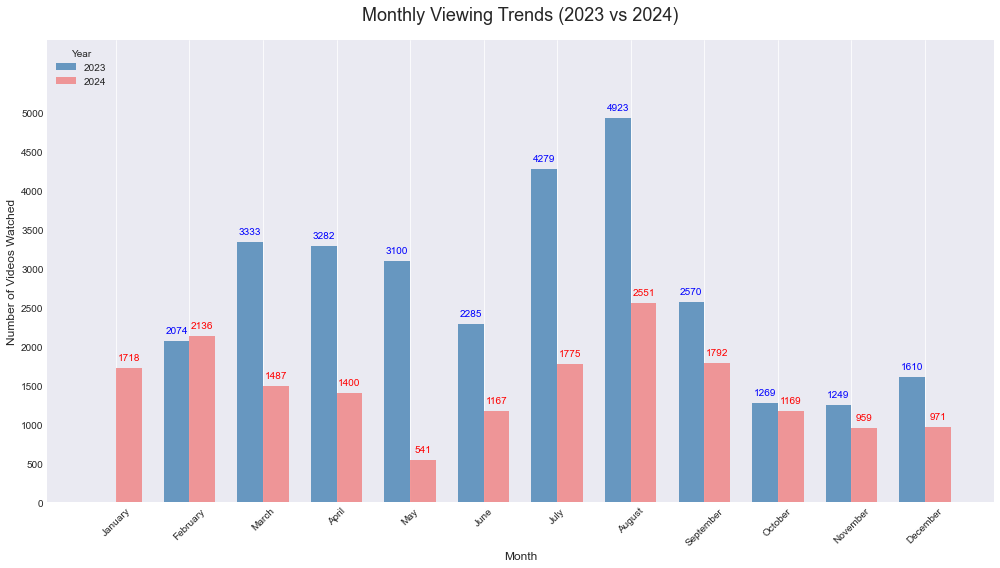

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the bar width and spacing
bar_width = 0.35

# Calculate x positions for the bars
x = range(len(monthly_counts.index))

# Initialize the figure
plt.figure(figsize=(14, 8))

# Plot bars for 2023 and 2024 with spacing
plt.bar(
    [i - bar_width / 2 for i in x], 
    monthly_counts[2023], 
    width=bar_width, 
    label="2023", 
    color="steelblue", 
    alpha=0.8
)
plt.bar(
    [i + bar_width / 2 for i in x], 
    monthly_counts[2024], 
    width=bar_width, 
    label="2024", 
    color="lightcoral", 
    alpha=0.8
)

# Annotate bar heights
for i, (value_2023, value_2024) in enumerate(zip(monthly_counts[2023], monthly_counts[2024])):
    # Annotate values for 2023
    if value_2023 > 0:
        plt.text(
            i - bar_width / 2, 
            value_2023 + 100,  # Place above the bar
            f"{int(value_2023)}", 
            ha="center", 
            fontsize=10, 
            color="blue"
        )
    # Annotate values for 2024
    if value_2024 > 0:
        plt.text(
            i + bar_width / 2, 
            value_2024 + 100,  # Place above the bar
            f"{int(value_2024)}", 
            ha="center", 
            fontsize=10, 
            color="red"
        )

# Customize the plot
plt.title("Monthly Viewing Trends (2023 vs 2024)", fontsize=18, pad=20)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Videos Watched", fontsize=12)
plt.xticks(x, monthly_counts.index, rotation=45, fontsize=10)
plt.yticks(range(0, monthly_counts.max().max() + 500, 500))  # Set consistent y-axis intervals
plt.ylim(0, monthly_counts.max().max() + 1000)  # Add some extra space above the highest bar for annotations
plt.legend(title="Year", fontsize=10, loc="upper left")  # Place legend inside the plot
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Save and display the plot
plt.tight_layout()
plt.savefig(os.path.join(VISUAL_DIR, "monthly_trends_with_numbers.png"))
plt.show()



In [73]:
def detect_binge_watching_sessions(df, time_window=60, min_videos=3):
    """
    Detects binge-watching sessions where at least `min_videos` videos
    are watched within `time_window` minutes.

    Parameters:
        df (pd.DataFrame): DataFrame containing 'Timestamp' column.
        time_window (int): Time window in minutes for binge session.
        min_videos (int): Minimum videos required to classify as binge.

    Returns:
        int: Total count of binge-watching sessions.
    """
    df_sorted = df.sort_values("Timestamp").reset_index(drop=True)
    binge_count = 0
    start_idx = 0

    for i in range(len(df_sorted)):
        time_diff = (df_sorted.loc[i, "Timestamp"] - df_sorted.loc[start_idx, "Timestamp"]).total_seconds() / 60
        while time_diff > time_window:
            start_idx += 1
            time_diff = (df_sorted.loc[i, "Timestamp"] - df_sorted.loc[start_idx, "Timestamp"]).total_seconds() / 60
        if i - start_idx + 1 >= min_videos:
            binge_count += 1
            start_idx = i

    return binge_count

# Calculate binge-watching sessions for 2023 and 2024
binge_2023 = detect_binge_watching_sessions(youtube_df[youtube_df["Year"] == 2023])
binge_2024 = detect_binge_watching_sessions(youtube_df[youtube_df["Year"] == 2024])

# Print results
print(f"Binge-Watching Sessions in 2023: {binge_2023}")
print(f"Binge-Watching Sessions in 2024: {binge_2024}")


Binge-Watching Sessions in 2023: 13906
Binge-Watching Sessions in 2024: 7762


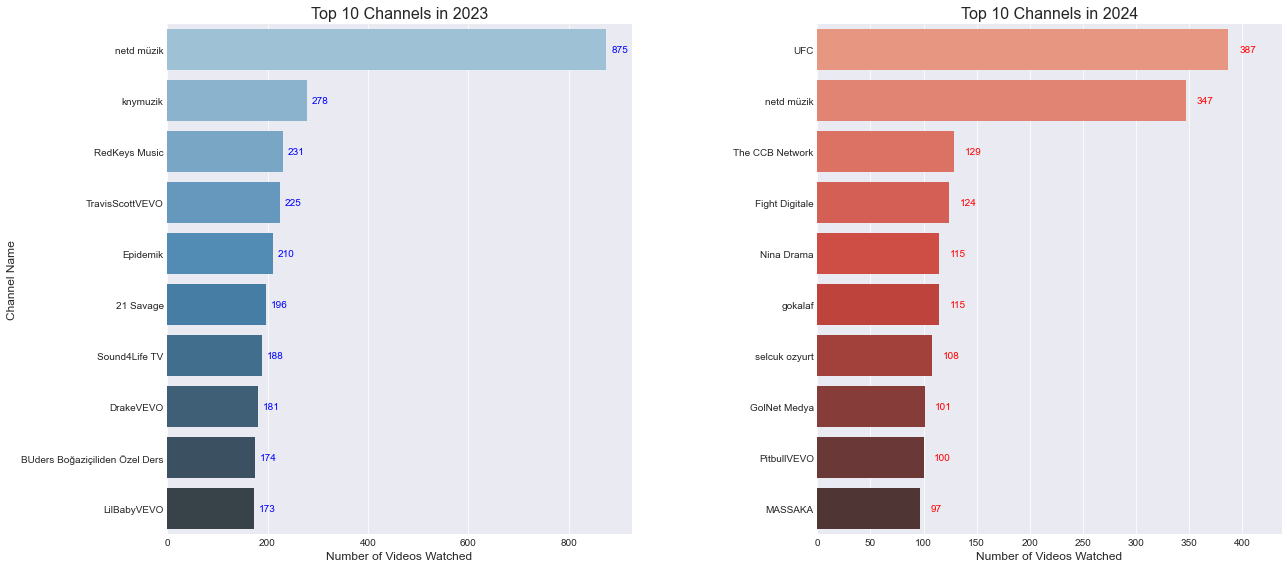

Total Unknown Channel Views in 2023: 2149
Total Unknown Channel Views in 2024: 631


In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

# Separate "Unknown Channel" counts
unknown_2023 = youtube_df[(youtube_df["Year"] == 2023) & (youtube_df["Channel Name"] == "Unknown Channel")]["Title"].count()
unknown_2024 = youtube_df[(youtube_df["Year"] == 2024) & (youtube_df["Channel Name"] == "Unknown Channel")]["Title"].count()

# Get top 10 channels excluding "Unknown Channel"
top_channels_2023 = (
    youtube_df[(youtube_df["Year"] == 2023) & (youtube_df["Channel Name"] != "Unknown Channel")]
    .groupby("Channel Name")["Title"]
    .count()
    .sort_values(ascending=False)
    .head(10)
)

top_channels_2024 = (
    youtube_df[(youtube_df["Year"] == 2024) & (youtube_df["Channel Name"] != "Unknown Channel")]
    .groupby("Channel Name")["Title"]
    .count()
    .sort_values(ascending=False)
    .head(10)
)

# Plot Top Channels
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# 2023 Top Channels
sns.barplot(x=top_channels_2023.values, y=top_channels_2023.index, ax=axes[0], palette="Blues_d")
axes[0].set_title("Top 10 Channels in 2023", fontsize=16)
axes[0].set_xlabel("Number of Videos Watched", fontsize=12)
axes[0].set_ylabel("Channel Name", fontsize=12)
axes[0].set_xlim(0, top_channels_2023.max() + 50)  # Add some padding to x-axis

# Annotate 2023 bars with counts
for i, value in enumerate(top_channels_2023.values):
    axes[0].text(value + 10, i, f"{value}", va="center", fontsize=10, color="blue")

# 2024 Top Channels
sns.barplot(x=top_channels_2024.values, y=top_channels_2024.index, ax=axes[1], palette="Reds_d")
axes[1].set_title("Top 10 Channels in 2024", fontsize=16)
axes[1].set_xlabel("Number of Videos Watched", fontsize=12)
axes[1].set_ylabel("")
axes[1].set_xlim(0, top_channels_2024.max() + 50)  # Add some padding to x-axis

# Annotate 2024 bars with counts
for i, value in enumerate(top_channels_2024.values):
    axes[1].text(value + 10, i, f"{value}", va="center", fontsize=10, color="red")

# Adjust layout and spacing
plt.tight_layout()
plt.subplots_adjust(wspace=0.4)  # Increase space between subplots

# Save and show the plot
plt.savefig(os.path.join(VISUAL_DIR, "top_channels_fixed.png"))
plt.show()

# Summary text for report
print(f"Total Unknown Channel Views in 2023: {unknown_2023}")
print(f"Total Unknown Channel Views in 2024: {unknown_2024}")



--- Statistical Test: Two-Sample T-Test (Daily Counts) ---
T-statistic: 10.167
P-value: 1.8136773491e-22
Result: Reject H0 -> There is a significant difference in daily watch counts between 2023 and 2024.


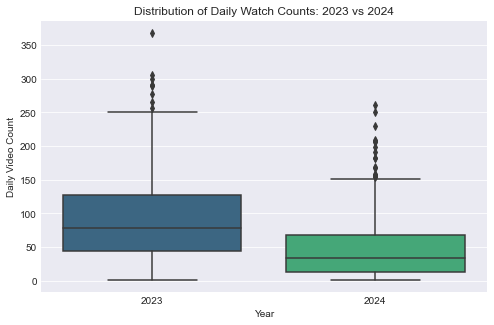

In [135]:
from scipy.stats import ttest_ind

# 1) Aggregate daily counts
youtube_df["Date"] = youtube_df["Timestamp"].dt.date  # just the date portion
daily_agg = (
    youtube_df.groupby(["Year", "Date"])["Title"]
    .count()
    .reset_index(name="DailyCount")
)

# Separate data for each year
daily_2023 = daily_agg[daily_agg["Year"] == 2023]["DailyCount"]
daily_2024 = daily_agg[daily_agg["Year"] == 2024]["DailyCount"]

# 2) Perform Two-Sample T-Test
# We'll assume these are independent samples and set equal_var=False
t_stat, p_value = ttest_ind(daily_2023, daily_2024, equal_var=False)
print("\n--- Statistical Test: Two-Sample T-Test (Daily Counts) ---")
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.10e}")


alpha = 0.05
if p_value < alpha:
    print("Result: Reject H0 -> There is a significant difference in daily watch counts between 2023 and 2024.")
else:
    print("Result: Fail to reject H0 -> No significant difference found in daily watch counts between 2023 and 2024.")

# 3) Boxplot of Daily Distributions
plt.figure(figsize=(8,5))
sns.boxplot(
    x="Year",
    y="DailyCount",
    data=daily_agg,
    palette="viridis"
)
plt.title("Distribution of Daily Watch Counts: 2023 vs 2024")
plt.xlabel("Year")
plt.ylabel("Daily Video Count")
plt.savefig(os.path.join(VISUAL_DIR, "daily_boxplot_2023_vs_2024.png"))
plt.show()

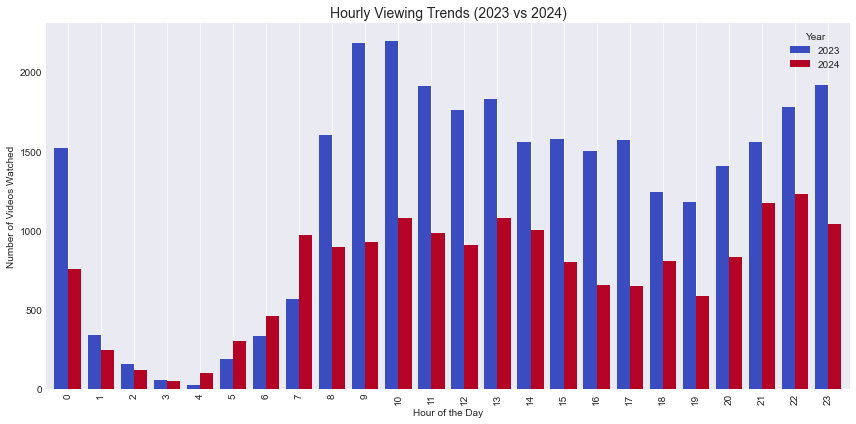

In [136]:
hourly_counts = youtube_df.groupby(["Hour", "Year"])["Title"].count().unstack()

hourly_counts.plot(kind="bar", figsize=(12, 6), width=0.8, colormap="coolwarm")
plt.title("Hourly Viewing Trends (2023 vs 2024)", fontsize=14)
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Videos Watched")
plt.legend(title="Year")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig(os.path.join(VISUAL_DIR, "hourly_trends_yearly.png"))
plt.show()


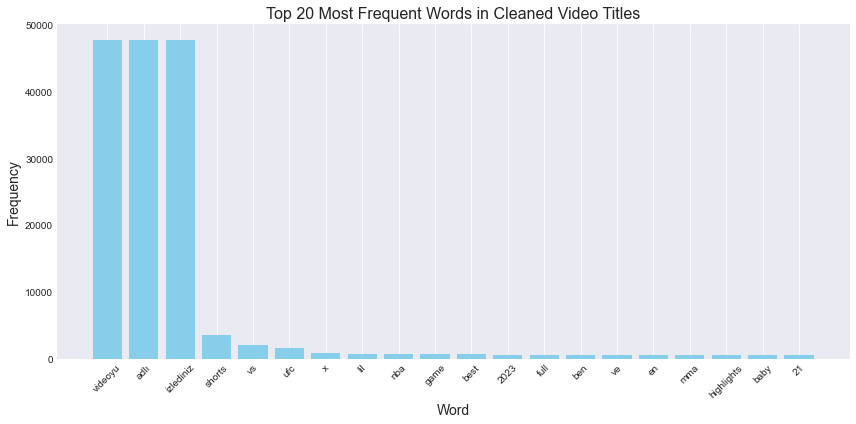

In [142]:
from collections import Counter
import re

# List of stopwords (you can expand this list based on your dataset)
stopwords = set([
    "video", "official", "feat", "ft", "music", "remix", "audio", "the", "and", "to",
    "of", "in", "on", "a", "is", "at", "it", "this", "by", "with", "for", "from", "up", 
    "how", "i", "you", "we", "me", "my", "your", "-", "+", "&", "#", "1", "2", "3", "4", 
    "5", "6", "7", "8", "9", "0", ""
])

# Function to clean titles
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    words = text.split()
    return [word for word in words if word not in stopwords]

# Apply cleaning to all titles
all_titles = youtube_df["Title"].dropna().apply(clean_text)

# Flatten the list of lists into a single list of words
cleaned_words = [word for title in all_titles for word in title]

# Count word frequencies
word_counts = Counter(cleaned_words)

# Get the top 20 most frequent words
top_words = pd.DataFrame(word_counts.items(), columns=["Word", "Count"]).sort_values(by="Count", ascending=False).head(20)

# Plot
plt.figure(figsize=(12, 6))
plt.bar(top_words["Word"], top_words["Count"], color="skyblue")
plt.title("Top 20 Most Frequent Words in Cleaned Video Titles", fontsize=16)
plt.xlabel("Word", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


In [144]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy.stats import ttest_ind

# Define directories
DATA_DIR_RAW = "data/raw/"
DATA_DIR_PROCESSED = "data/processed/"
VISUAL_DIR = "visualizations/"
os.makedirs(VISUAL_DIR, exist_ok=True)

# Load raw data
raw_json_path = os.path.join(DATA_DIR_RAW, "izleme_gecmisi.json")
processed_csv_path = os.path.join(DATA_DIR_PROCESSED, "youtube_cleaned.csv")

# Load and clean the data
data = pd.read_json(raw_json_path)

# Extract relevant fields
df = pd.json_normalize(data)
df = df[["time", "title", "subtitles", "titleUrl"]]

# Clean and process fields
df["Timestamp"] = pd.to_datetime(df["time"], errors="coerce")
df["Channel Name"] = df["subtitles"].apply(
    lambda x: x[0]["name"] if isinstance(x, list) else "Unknown Channel"
)
df["Title"] = df["title"].fillna("Unknown Title")
df.drop(columns=["time", "subtitles"], inplace=True)

# Add derived features
df["Year"] = df["Timestamp"].dt.year
df["Month"] = df["Timestamp"].dt.month_name()
df["Day"] = df["Timestamp"].dt.day_name()
df["Hour"] = df["Timestamp"].dt.hour

# Filter for 2023 and 2024
df = df[df["Year"].isin([2023, 2024])]

# Save cleaned data
os.makedirs(DATA_DIR_PROCESSED, exist_ok=True)
df.to_csv(processed_csv_path, index=False)
print(f"Cleaned data saved to {processed_csv_path}")

# Check data
print(df.head())

# Define helper functions for new analysis
def binge_watching_analysis(df, time_window=60):
    df = df.sort_values("Timestamp").reset_index(drop=True)
    sessions = []
    current_session = [df.iloc[0]["Timestamp"]]

    for i in range(1, len(df)):
        time_diff = (df.iloc[i]["Timestamp"] - current_session[-1]).total_seconds() / 60
        if time_diff <= time_window:
            current_session.append(df.iloc[i]["Timestamp"])
        else:
            sessions.append(len(current_session))
            current_session = [df.iloc[i]["Timestamp"]]

    if current_session:
        sessions.append(len(current_session))

    return {
        "total_sessions": len(sessions),
        "average_session_length": np.mean(sessions),
        "max_session_length": max(sessions),
        "session_lengths": sessions,
    }

# Analyze binge-watching behavior
binge_2023 = binge_watching_analysis(df[df["Year"] == 2023])
binge_2024 = binge_watching_analysis(df[df["Year"] == 2024])

# Print binge-watching insights
print("Binge-Watching Analysis (2023):", binge_2023)
print("Binge-Watching Analysis (2024):", binge_2024)

# Visualize binge-watching session lengths
plt.figure(figsize=(10, 6))
sns.histplot(binge_2023["session_lengths"], label="2023", kde=True, color="blue", alpha=0.6)
sns.histplot(binge_2024["session_lengths"], label="2024", kde=True, color="orange", alpha=0.6)
plt.title("Distribution of Binge-Watching Session Lengths", fontsize=16)
plt.xlabel("Number of Videos per Session", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.legend(title="Year")
plt.tight_layout()
plt.savefig(os.path.join(VISUAL_DIR, "binge_watching_distribution.png"))
plt.show()

# Analyze unique channels
channel_diversity = df.groupby("Year")["Channel Name"].nunique()
print("Unique Channels Watched by Year:")
print(channel_diversity)

# Visualize channel diversity
plt.figure(figsize=(8, 5))
sns.barplot(x=channel_diversity.index, y=channel_diversity.values, palette="coolwarm")
plt.title("Channel Diversity by Year", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Unique Channels", fontsize=14)
for i, value in enumerate(channel_diversity.values):
    plt.text(i, value + 5, f"{value}", ha="center", fontsize=12)
plt.tight_layout()
plt.savefig(os.path.join(VISUAL_DIR, "channel_diversity.png"))
plt.show()

# Heatmap for hourly and daily trends
heatmap_data = df.groupby(["Day", "Hour"])["Title"].count().unstack()
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Viewing Patterns by Day and Hour", fontsize=16)
plt.xlabel("Hour", fontsize=14)
plt.ylabel("Day", fontsize=14)
plt.tight_layout()
plt.savefig(os.path.join(VISUAL_DIR, "viewing_patterns_heatmap.png"))
plt.show()

# Monthly trends with annotations
monthly_trends = df.groupby(["Year", "Month"])["Title"].count().unstack()
plt.figure(figsize=(12, 6))
monthly_trends.plot(kind="line", marker="o")
plt.title("Monthly Viewing Trends (2023 vs 2024)", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Number of Videos Watched", fontsize=14)
plt.legend(title="Year")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig(os.path.join(VISUAL_DIR, "monthly_trends_annotated.png"))
plt.show()

# Statistical analysis
counts_2023 = df[df["Year"] == 2023]["Title"].count()
counts_2024 = df[df["Year"] == 2024]["Title"].count()
t_stat, p_value = ttest_ind([counts_2023], [counts_2024], alternative="two-sided")
print(f"T-Statistic: {t_stat:.2f}, P-Value: {p_value:.4f}")
if p_value < 0.05:
    print("The difference in viewing patterns between 2023 and 2024 is statistically significant.")
else:
    print("No significant difference in viewing patterns between 2023 and 2024.")


AttributeError: 'str' object has no attribute 'values'